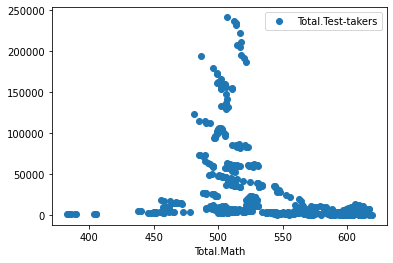

535.6828422876949 27914.242634315426
-392948863.59792024 1227926.9601386483 1197822039404.0312
46.131583336973904 45562.57318483698


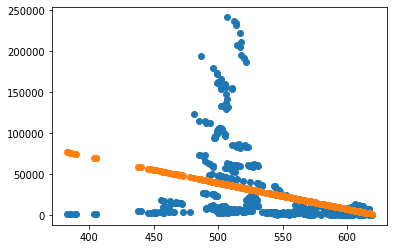

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/home/root1/Desktop/school_scores.csv")
df


df.plot(x="Total.Math", y="Total.Test-takers", style="o")
plt.show()


x_mean = df["Total.Math"].mean()
y_mean = df["Total.Test-takers"].mean()
print(x_mean, y_mean)


df["x"] = df["Total.Math"] - x_mean
df["y"] = df["Total.Test-takers"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df


summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)


correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation


def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5


std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

m = correlation * (std_deviation_y / std_deviation_x)
m


c = df["Total.Test-takers"].mean() - m * df["Total.Math"].mean()
c


df["y_prediction"] = m * df["Total.Math"] + c
df


plot1 = plt.scatter(df["Total.Math"], df["Total.Test-takers"])
plot2 = plt.scatter(df["Total.Math"], df["y_prediction"])
plt.show()